# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# counters
city_counter = 0
set_counter = 1

# create the lists to hold requested data
cities_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print('-------------------------')

# Create a query url for each city in the cities list to get json response
for city in cities:
    query_url = base_url + "&q=" + city
    # pull weather data
    response = requests.get(query_url).json()
    if city_counter < 50:
        city_counter += 1
    else:
        set_counter += 1
        city_counter = 1

    # print  results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")

   # add values to the empty lists
    try:       
        cities_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        pass
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | erbaa
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | coromandel
Processing Record 6 of Set 1 | araouane
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ndele
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kawambwa
Processing Record 14 of Set 1 | raga
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | the pas
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | bonthe
Processing Record 22 of Set 1 | westport
Processing Record 23 of Set 1 | cururupu
Processing Record 24 of Set 

Processing Record 44 of Set 4 | arman
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | poli
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | pedasi
Processing Record 49 of Set 4 | linqiong
Processing Record 50 of Set 4 | castelnaudary
Processing Record 1 of Set 5 | nicoya
Processing Record 2 of Set 5 | lincoln
Processing Record 3 of Set 5 | chandbali
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | uetendorf
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | samusu
City not found. Skipping...
Processing Record 8 of Set 5 | asayita
City not found. Skipping...
Processing Record 9 of Set 5 | sinnamary
Processing Record 10 of Set 5 | kenitra
Processing Record 11 of Set 5 | beringovskiy
Processing Record 12 of Set 5 | damaturu
Processing Record 13 of Set 5 | gweta
Processing Record 14 of Set 5 | baykit
Processing Record 15 of Set 5 

Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | portoferraio
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | pevek
Processing Record 39 of Set 8 | puno
Processing Record 40 of Set 8 | kaniama
Processing Record 41 of Set 8 | teguldet
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | iracoubo
Processing Record 44 of Set 8 | aklavik
Processing Record 45 of Set 8 | yanam
Processing Record 46 of Set 8 | sorong
Processing Record 47 of Set 8 | zemio
Processing Record 48 of Set 8 | shawville
Processing Record 49 of Set 8 | saint-joseph
Processing Record 50 of Set 8 | skovde
City not found. Skipping...
Processing Record 1 of Set 9 | mrirt
City not found. Skipping...
Processing Record 2 of Set 9 | salym
Processing Record 3 of Set 9 | sohbatpur
Processing Record 4 of Set 9 | jega
Processing Record 5 of Set 9 | palmer
Processing Record 6 of Set 9 | murmansk
Processing Record 7 of Set 9 | batem

Processing Record 19 of Set 12 | portland
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | luanda
Processing Record 22 of Set 12 | kutum
Processing Record 23 of Set 12 | mchinji
Processing Record 24 of Set 12 | karasjok
Processing Record 25 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 26 of Set 12 | cap malheureux
Processing Record 27 of Set 12 | rumford
Processing Record 28 of Set 12 | caraballeda
Processing Record 29 of Set 12 | korhogo
Processing Record 30 of Set 12 | botshabelo
Processing Record 31 of Set 12 | nam tha
City not found. Skipping...
Processing Record 32 of Set 12 | beberibe
Processing Record 33 of Set 12 | alindao
Processing Record 34 of Set 12 | jardim
Processing Record 35 of Set 12 | svetlyy
Processing Record 36 of Set 12 | lantawan
Processing Record 37 of Set 12 | bouna
Processing Record 38 of Set 12 | shahrud
Processing Record 39 of Set 12 | safakulevo
Processing Record 40 of Set 12 | aripuana
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_data = {
    "City": cities_list,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Max Temp      549
Lat           549
Lng           549
Wind Speed    549
dtype: int64

In [27]:
# show dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,Erbaa,40,TR,1579922363,69,33.80,40.67,36.57,6.93
1,Hofn,100,IS,1579922363,97,36.28,64.25,-15.21,44.52
2,East London,40,ZA,1579922303,77,69.80,-33.02,27.91,4.70
3,Mataura,72,NZ,1579922329,58,66.99,-46.19,168.86,10.00
4,Coromandel,100,BR,1579922364,98,66.63,-18.47,-47.20,9.69


In [30]:
# export to a csv file
weather_df.to_csv("output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

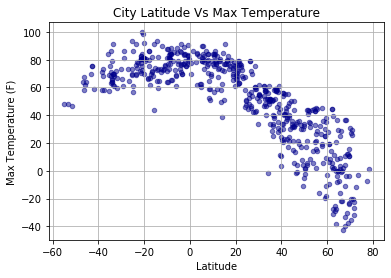

In [63]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='DarkBlue', alpha=0.5)
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# ARE WE SUPPOSED TO NOW READ IN THE CSV?
# HOW TO GET THE DATE IN THE TITTLE?
plt.savefig("images/Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

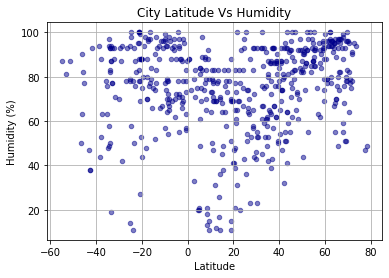

In [64]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue', alpha=0.5)
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("images/Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

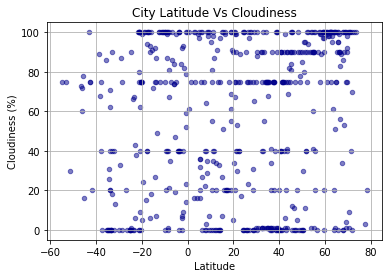

In [62]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='DarkBlue', alpha=0.5)
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("images/Lat_Clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

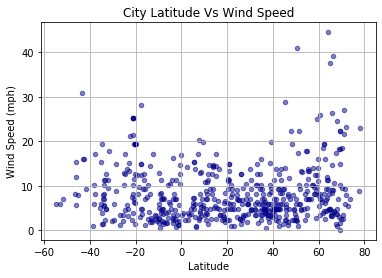

In [61]:
# scatter plot creation
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue', alpha=0.5)
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("images/Lat_Wind.png")
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression